In [1]:
#plot destination
%matplotlib inline

#set up session

import cosima_cookbook as cc

import IPython.display
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
import xarray as xr
import cmocean as cm
import pandas as pd
import cartopy.crs as crs
import scipy.stats
import scipy.signal
import dask.array

import gsw
# https://programtalk.com/python-examples/gsw.rho/
# https://pypi.org/project/seawater/3.3/
# https://pythonhosted.org/seawater/eos80.html
# https://teos-10.github.io/GSW-Python/conversions.html
# https://python.hotexamples.com/examples/gsw/-/p_from_z/python-p_from_z-function-examples.html
# http://www.teos-10.org/pubs/gsw/html/gsw_p_from_z.html

from matplotlib import ticker

import matplotlib.gridspec as gridspec # GRIDSPEC !
from matplotlib.colorbar import Colorbar

#connect to database
session = cc.database.create_session(db='/g/data/ik11/databases/cosima_master.db')
#db='/g/data/ik11/databases/cosima_master.db'
#db='/g/data/hh5/tmp/cosima/database/access-om2.db'

from dask.distributed import Client
cl=Client(n_workers=4)
cl

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42659/status,
Dashboard: /proxy/42659/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39299,Workers: 4
Dashboard: /proxy/42659/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:45465,Total threads: 1
Dashboard: /proxy/38079/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:35427,


Loading T and S data

In [24]:
expt    = '025deg_jra55_iaf_omip2_cycle6'  

st_n = '1966-01' #'1985-01-01' # Use this set for loading the data
en_n = '2016-01'

#! To slice the data
var1 = 'temp'
var2 = 'salt'

latmin = -90
latmax = -50

zmin = 0
zmax = 500

st1 = '1985-01-01'
en1 = '2015-12-31'

temp_ds = cc.querying.getvar(expt=expt, variable=var1, 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time=st_n, end_time=en_n).sel(yt_ocean= slice(latmin, latmax), st_ocean= slice(zmin, zmax), time=slice(st1, en1))
temp = temp_ds-273.15



In [25]:
temp_ds

,Array,Chunk
Bytes,12.21 GiB,1.14 MiB
Shape,"(372, 23, 266, 1440)","(1, 23, 108, 120)"
Count,307203 Tasks,13392 Chunks
Type,float32,numpy.ndarray


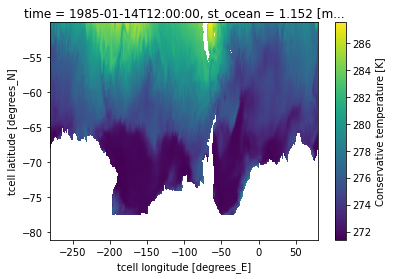

In [31]:
temp_ds[0,0,:,:].plot()

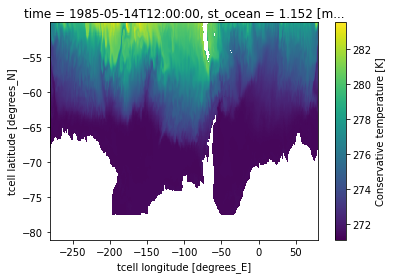

In [26]:
temp_ds[4,0,:,:].plot()

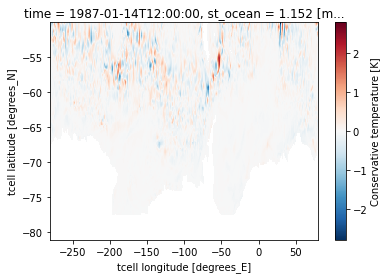

In [27]:
temp_ds[24,0,:,:].plot()

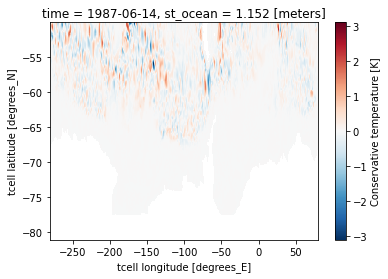

In [28]:
temp_ds[29,0,:,:].plot()

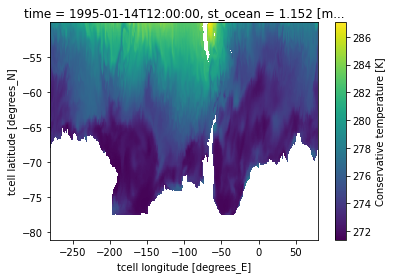

In [30]:
temp_ds[120,0,:,:].plot()

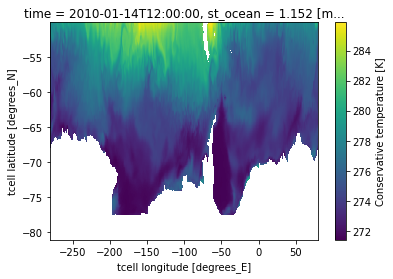

In [32]:
temp_ds[300,0,:,:].plot()